#**GRADES PREDICTION - GROUP 1**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Education Problem'
%ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1VLhHZiw8t-jb49FpYHfR0dgO6hjbu9RK/Education Problem
'Bản sao của grades_prediction_mayhoc.ipynb'   model_old/
 data/                                         new_data_preprocessing.ipynb
 data_preprocessing.ipynb                      __pycache__/
 data_raw/                                     result/
 grades_prediction_dnn.ipynb                   result_13_19_no_info/
 grades_prediction_mayhoc.ipynb                result_13_22_no_info/
 grades_prediction_rnn.ipynb                   test.ipynb
 model/                                        utils.py
 model_13_19_no_info/                          visualize.drawio
 model_13_22_no_info/


#**1. Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import json
import math
from utils import minmax_scale, load_data, data_range, visualize_result, save_result
import time
import os

import tensorflow as tf
from keras.layers import Input, LSTM, SimpleRNN, TimeDistributed, Dense
from keras import models
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#**2. Load Data**

In [ ]:
train_path = 'data/train_dict.json'
test_path = 'data/test_dict.json'

In [ ]:
input_dim = 2 # thay đổi
output_dim = 2 # thay đổi

method_name = 'polyreg' # Chữ thường
model_path = f"./model/{method_name}_{input_dim}_{output_dim}"
result_path = f'./result/input{input_dim}_output{output_dim}.csv'

In [ ]:
X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim)
X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim)
# chưa flatten

100%|██████████| 5358/5358 [00:00<00:00, 280289.87it/s]


#**3. Experiment**

## Polynomial Regression

### 13_19_info

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

train_path = 'data/final_train_dict.json'
test_path = 'data/final_test_dict.json'

for input_dim in range(1, 7):
    for output_dim in range(1, 3):
      method_name = 'polyreg' # Chữ thường
      model_path = f"./model/{method_name}_{input_dim}_{output_dim}"
      result_path = f'./result/input{input_dim}_output{output_dim}.csv'
      X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim)
      X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim)
      print(f'Input{input_dim}, Ouput{output_dim}: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

      poly = PolynomialFeatures()
      #TRAIN
      start = time.time()
      nsamples, nx = X_train.shape
      X_poly = poly.fit_transform(X_train)

      poly.fit(X_poly, y_train)
      lin_poly = LinearRegression()
      lin_poly.fit(X_poly, y_train)
      end = time.time()

      #TEST
      predictions = lin_poly.predict(poly.fit_transform(X_test))
      #remove false pred **
      y_test=y_test[(predictions < 1)]
      predictions=predictions[(predictions < 1)]
      y_test=y_test[(predictions > 0)]
      predictions=predictions[(predictions > 0)]
      #SAVE
      pickle.dump(poly, open(model_path, "wb"))
      save_result(result_path, method_name, end-start, mean_squared_error(y_test[:-1], predictions[:-1]))
      df = pd.read_csv(result_path)
      print(df)

Input1, Ouput1:  (40789, 16) (40789, 1) (19579, 16) (19579, 1)
    method       time           mse
0      dnn  75.356532  2.764805e-02
1  polyreg   0.920377  6.981916e+21
2    lnreg   0.041981  2.789631e-02
3     rdfr   0.027217  2.789631e-02
4   xgboot   0.323040  2.656357e-02
Input1, Ouput2:  (35808, 16) (35808, 2) (16509, 16) (16509, 2)
    method       time           mse
0      dnn  66.794511  2.345148e-02
1  polyreg   0.946883  2.405565e+21
2    lnreg   0.023600  2.473289e-02
3     rdfr   0.029881  2.473289e-02
4   xgboot   0.451698  2.409121e-02
Input2, Ouput1:  (35808, 19) (35808, 1) (16509, 19) (16509, 1)
    method       time           mse
0  polyreg   1.088564  1.109516e+21
1    lnreg   0.031370  2.840823e-02
2     rdfr   0.030082  2.840823e-02
3   xgboot   0.298880  2.768494e-02
4      dnn  83.127582  2.912136e-02
Input2, Ouput2:  (30990, 19) (30990, 2) (13520, 19) (13520, 2)
    method       time           mse
0    lnreg   0.031790  2.442734e-02
1  polyreg   0.808223  9.953

### 13_19_no_info

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

train_path = 'data/old_train_dict_v2.json'
test_path = 'data/old_test_dict_v2.json'

for input_dim in range(1, 7):
    for output_dim in range(1, 3):
      method_name = 'polyreg' # Chữ thường
      model_path = f"./model_13_19_no_info/{method_name}_{input_dim}_{output_dim}"
      result_path = f'./result_13_19_no_info/input{input_dim}_output{output_dim}.csv'
      X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim, info=False)
      X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim, info=False)
      print(f'Input{input_dim}, Ouput{output_dim}: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

      poly = PolynomialFeatures()
      #TRAIN
      start = time.time()
      nsamples, nx = X_train.shape
      X_poly = poly.fit_transform(X_train)

      poly.fit(X_poly, y_train)
      lin_poly = LinearRegression()
      lin_poly.fit(X_poly, y_train)
      end = time.time()

      #TEST
      predictions = lin_poly.predict(poly.fit_transform(X_test))
      #remove false pred **
      y_test=y_test[(predictions < 1)]
      predictions=predictions[(predictions < 1)]
      y_test=y_test[(predictions > 0)]
      predictions=predictions[(predictions > 0)]
      #SAVE
      pickle.dump(poly, open(model_path, "wb"))
      save_result(result_path, method_name, end-start, mean_squared_error(y_test[:-1], predictions[:-1]))
      df = pd.read_csv(result_path)
      print(df)

Input1, Ouput1:  (35808, 3) (35808, 1) (16509, 3) (16509, 1)
    method      time       mse
0      dnn  82.90019  0.029023
1  polyreg   0.05218  0.027724
    method      time       mse
0      dnn  82.90019  0.029023
1  polyreg   0.05218  0.027724
Input1, Ouput2:  (30990, 3) (30990, 2) (13520, 3) (13520, 2)
    method       time       mse
0      dnn  65.979375  0.024905
1  polyreg   0.017323  0.024210
    method       time       mse
0      dnn  65.979375  0.024905
1  polyreg   0.017323  0.024210
Input2, Ouput1:  (30990, 6) (30990, 1) (13520, 6) (13520, 1)
    method       time       mse
0      dnn  61.434459  0.029840
1  polyreg   0.043995  0.029619
    method       time       mse
0      dnn  61.434459  0.029840
1  polyreg   0.043995  0.029619
Input2, Ouput2:  (26282, 6) (26282, 2) (10588, 6) (10588, 2)
    method       time       mse
0      dnn  83.354722  0.026002
1  polyreg   0.036547  0.025756
    method       time       mse
0      dnn  83.354722  0.026002
1  polyreg   0.036547  0.0

### 13_22_no_info

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

train_path = 'data/train_dict.json'
test_path = 'data/test_dict.json'

for input_dim in range(1, 7):
    for output_dim in range(1, 3):
      if(input_dim + output_dim >= 7):
        continue
      else:
        method_name = 'polyreg' # Chữ thường
        model_path = f"./model_13_22_no_info/{method_name}_{input_dim}_{output_dim}"
        result_path = f'./result_13_22_no_info/input{input_dim}_output{output_dim}.csv'
        X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim, info=False)
        X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim, info=False)
        print(f'Input{input_dim}, Ouput{output_dim}: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

        poly = PolynomialFeatures()
        #TRAIN
        start = time.time()
        nsamples, nx = X_train.shape
        X_poly = poly.fit_transform(X_train)

        poly.fit(X_poly, y_train)
        lin_poly = LinearRegression()
        lin_poly.fit(X_poly, y_train)
        end = time.time()

        #TEST
        predictions = lin_poly.predict(poly.fit_transform(X_test))
        #remove false pred **
        y_test=y_test[(predictions < 1)]
        predictions=predictions[(predictions < 1)]
        y_test=y_test[(predictions > 0)]
        predictions=predictions[(predictions > 0)]
        #SAVE
        pickle.dump(poly, open(model_path, "wb"))
        save_result(result_path, method_name, end-start, mean_squared_error(y_test[:-1], predictions[:-1]))
        df = pd.read_csv(result_path)
        print(df)

Input1, Ouput1:  (52317, 3) (52317, 1) (7350, 3) (7350, 1)
    method        time       mse
0      dnn  105.609668  0.029648
1  polyreg    0.032536  0.029733
    method        time       mse
0      dnn  105.609668  0.029648
1  polyreg    0.032536  0.029733
Input1, Ouput2:  (44510, 3) (44510, 2) (3925, 3) (3925, 2)
    method        time       mse
0      dnn  143.421491  0.030268
1  polyreg    0.089021  0.030260
    method        time       mse
0      dnn  143.421491  0.030268
1  polyreg    0.089021  0.030260
Input2, Ouput1:  (44510, 6) (44510, 1) (3925, 6) (3925, 1)
    method       time       mse
0      dnn  93.208508  0.052822
1  polyreg   0.221565  0.046807
    method       time       mse
0      dnn  93.208508  0.052822
1  polyreg   0.221565  0.046807
Input2, Ouput2:  (36870, 6) (36870, 2) (2006, 6) (2006, 2)
    method       time       mse
0      dnn  83.063179  0.039436
1  polyreg   0.076713  0.031791
    method       time       mse
0      dnn  83.063179  0.039436
1  polyreg   0.0

## Linear reg

### 13_19_info

In [ ]:
from sklearn.linear_model import LinearRegression
import pickle

train_path = 'data/final_train_dict.json'
test_path = 'data/final_test_dict.json'

for input_dim in range(1, 7):
    for output_dim in range(1, 3):
      method_name = 'lnreg' # Chữ thường
      model_path = f"./model/{method_name}_{input_dim}_{output_dim}"
      result_path = f'./result/input{input_dim}_output{output_dim}.csv'
      X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim)
      X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim)

      model = LinearRegression()

      #TRAIN
      start = time.time()
      model.fit(X_train, y_train)
      end = time.time()

      #SAVE
      pickle.dump(model, open(model_path, "wb"))

      #TEST
      pickle.load(open(model_path, "rb"))
      predictions = model.predict(X_test)
      save_result(result_path, method_name, end-start, mean_squared_error(y_test, predictions))
      df = pd.read_csv(result_path)
      print(df)

    method       time           mse
0      dnn  75.356532  2.764805e-02
1  polyreg   0.702567  6.981559e+21
2    lnreg   0.041981  2.789631e-02
    method       time           mse
0      dnn  75.356532  2.764805e-02
1  polyreg   0.702567  6.981559e+21
2    lnreg   0.041981  2.789631e-02
    method       time           mse
0      dnn  66.794511  2.345148e-02
1  polyreg   1.044384  2.405420e+21
2    lnreg   0.023600  2.473289e-02
    method       time           mse
0      dnn  66.794511  2.345148e-02
1  polyreg   1.044384  2.405420e+21
2    lnreg   0.023600  2.473289e-02
    method       time           mse
0  polyreg   1.036613  1.109448e+21
1    lnreg   0.031370  2.840823e-02
2     rdfr  24.094130  3.055462e-02
3   xgboot   0.205851  2.847031e-02
4      dnn  83.127582  2.912136e-02
    method       time           mse
0    lnreg   0.031790  2.442734e-02
1  polyreg   0.748098  9.952599e+21
2     rdfr  20.144833  3.078194e-02
3   xgboot   0.339503  2.861843e-02
4      dnn  82.921070  2.358

### 13_19_no_info

In [ ]:
from sklearn.linear_model import LinearRegression
import pickle

train_path = 'data/old_train_dict_v2.json'
test_path = 'data/old_test_dict_v2.json'

for input_dim in range(1, 7):
    for output_dim in range(1, 3):
      method_name = 'lnreg' # Chữ thường
      model_path = f"./model_13_19_no_info/{method_name}_{input_dim}_{output_dim}"
      result_path = f'./result_13_19_no_info/input{input_dim}_output{output_dim}.csv'
      X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim)
      X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim)

      model = LinearRegression()

      #TRAIN
      start = time.time()
      model.fit(X_train, y_train)
      end = time.time()

      #SAVE
      pickle.dump(model, open(model_path, "wb"))

      #TEST
      pickle.load(open(model_path, "rb"))
      predictions = model.predict(X_test)
      save_result(result_path, method_name, end-start, mean_squared_error(y_test, predictions))
      df = pd.read_csv(result_path)
      print(df)

    method       time       mse
0      dnn  82.900190  0.029023
1  polyreg   0.052180  0.027724
2    lnreg   0.007854  0.028376
3     rdfr   0.007646  0.028376
4   xgboot   0.171629  0.027862
    method       time       mse
0      dnn  65.979375  0.024905
1  polyreg   0.017323  0.024210
2    lnreg   0.009996  0.024443
3     rdfr   0.009560  0.024443
4   xgboot   0.303061  0.024638
    method       time       mse
0      dnn  61.434459  0.029840
1  polyreg   0.043995  0.029619
2    lnreg   0.009331  0.030734
3     rdfr   0.009023  0.030734
4   xgboot   1.875730  0.029547
    method       time       mse
0      dnn  83.354722  0.026002
1  polyreg   0.036547  0.025756
2    lnreg   0.010558  0.026809
3     rdfr   0.009908  0.026809
4   xgboot   0.202763  0.026893
    method       time       mse
0      dnn  83.001714  0.035290
1  polyreg   0.092297  0.034517
2    lnreg   0.009786  0.035738
3     rdfr   0.009997  0.035738
4   xgboot   0.145496  0.033666
    method       time       mse
0      d

### 13_22_no_info

In [ ]:
from sklearn.linear_model import LinearRegression
import pickle

train_path = 'data/train_dict.json'
test_path = 'data/test_dict.json'

for input_dim in range(1, 7):
    for output_dim in range(1, 3):
      if(input_dim + output_dim >= 7):
        continue
      else:
        method_name = 'lnreg' # Chữ thường
        model_path = f"./model_13_22_no_info/{method_name}_{input_dim}_{output_dim}"
        result_path = f'./result_13_22_no_info/input{input_dim}_output{output_dim}.csv'
        X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim)
        X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim)

        model = LinearRegression()

        #TRAIN
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()

        #SAVE
        pickle.dump(model, open(model_path, "wb"))

        #TEST
        pickle.load(open(model_path, "rb"))
        predictions = model.predict(X_test)
        save_result(result_path, method_name, end-start, mean_squared_error(y_test, predictions))
        df = pd.read_csv(result_path)
        print(df)

    method        time       mse
0      dnn  105.609668  0.029648
1  polyreg    0.032536  0.029733
2     rdfr    0.015402  0.029521
3   xgboot    0.163536  0.028849
4    lnreg    0.011190  0.029521
    method        time       mse
0      dnn  105.609668  0.029648
1  polyreg    0.032536  0.029733
2     rdfr    0.015402  0.029521
3   xgboot    0.163536  0.028849
4    lnreg    0.011190  0.029521
    method        time       mse
0      dnn  143.421491  0.030268
1  polyreg    0.089021  0.030260
2     rdfr    0.012193  0.029500
3   xgboot    0.253575  0.028535
4    lnreg    0.012808  0.029500
    method        time       mse
0      dnn  143.421491  0.030268
1  polyreg    0.089021  0.030260
2     rdfr    0.012193  0.029500
3   xgboot    0.253575  0.028535
4    lnreg    0.012808  0.029500
    method       time       mse
0      dnn  93.208508  0.052822
1  polyreg   0.221565  0.046807
2     rdfr   0.013881  0.046239
3   xgboot   0.187009  0.043556
4    lnreg   0.013160  0.046239
    method      

## Random Forest

### 13_19_info

In [ ]:
from sklearn.linear_model import LinearRegression
import pickle

train_path = 'data/final_train_dict.json'
test_path = 'data/final_test_dict.json'

for input_dim in range(1, 7):
    for output_dim in range(1, 3):
      method_name = 'rdfr' # Chữ thường
      model_path = f"./model/{method_name}_{input_dim}_{output_dim}"
      result_path = f'./result/input{input_dim}_output{output_dim}.csv'
      X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim)
      X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim)

      from sklearn.ensemble import RandomForestRegressor
      regressor = RandomForestRegressor(n_estimators=100, random_state=0)

      #TRAIN
      start = time.time()
      model.fit(X_train, y_train)
      end = time.time()

      #SAVE
      pickle.dump(model, open(model_path, "wb"))

      #TEST
      pickle.load(open(model_path, "rb"))
      predictions = model.predict(X_test)
      save_result(result_path, method_name, end-start, mean_squared_error(y_test, predictions))
      df = pd.read_csv(result_path)
      print(df)

    method       time           mse
0      dnn  75.356532  2.764805e-02
1  polyreg   0.702567  6.981559e+21
2    lnreg   0.041981  2.789631e-02
3     rdfr   0.027217  2.789631e-02
    method       time           mse
0      dnn  75.356532  2.764805e-02
1  polyreg   0.702567  6.981559e+21
2    lnreg   0.041981  2.789631e-02
3     rdfr   0.027217  2.789631e-02
    method       time           mse
0      dnn  66.794511  2.345148e-02
1  polyreg   1.044384  2.405420e+21
2    lnreg   0.023600  2.473289e-02
3     rdfr   0.029881  2.473289e-02
    method       time           mse
0      dnn  66.794511  2.345148e-02
1  polyreg   1.044384  2.405420e+21
2    lnreg   0.023600  2.473289e-02
3     rdfr   0.029881  2.473289e-02
    method       time           mse
0  polyreg   1.036613  1.109448e+21
1    lnreg   0.031370  2.840823e-02
2     rdfr   0.030082  2.840823e-02
3   xgboot   0.205851  2.847031e-02
4      dnn  83.127582  2.912136e-02
    method       time           mse
0    lnreg   0.031790  2.442

### 13_19_no_info

In [ ]:
from sklearn.linear_model import LinearRegression
import pickle

train_path = 'data/old_train_dict_v2.json'
test_path = 'data/old_test_dict_v2.json'

for input_dim in range(1, 7):
    for output_dim in range(1, 3):
      method_name = 'rdfr' # Chữ thường
      model_path = f"./model_13_19_no_info/{method_name}_{input_dim}_{output_dim}"
      result_path = f'./result_13_19_no_info/input{input_dim}_output{output_dim}.csv'
      X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim)
      X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim)

      from sklearn.ensemble import RandomForestRegressor
      regressor = RandomForestRegressor(n_estimators=100, random_state=0)

      #TRAIN
      start = time.time()
      model.fit(X_train, y_train)
      end = time.time()

      #SAVE
      pickle.dump(model, open(model_path, "wb"))

      #TEST
      pickle.load(open(model_path, "rb"))
      predictions = model.predict(X_test)
      save_result(result_path, method_name, end-start, mean_squared_error(y_test, predictions))
      df = pd.read_csv(result_path)
      print(df)

    method       time       mse
0      dnn  82.900190  0.029023
1  polyreg   0.052180  0.027724
2    lnreg   0.016078  0.029521
3     rdfr   0.007646  0.028376
    method       time       mse
0      dnn  82.900190  0.029023
1  polyreg   0.052180  0.027724
2    lnreg   0.016078  0.029521
3     rdfr   0.007646  0.028376
    method       time       mse
0      dnn  65.979375  0.024905
1  polyreg   0.017323  0.024210
2    lnreg   0.016718  0.029500
3     rdfr   0.009560  0.024443
    method       time       mse
0      dnn  65.979375  0.024905
1  polyreg   0.017323  0.024210
2    lnreg   0.016718  0.029500
3     rdfr   0.009560  0.024443
    method       time       mse
0      dnn  61.434459  0.029840
1  polyreg   0.043995  0.029619
2    lnreg   0.024135  0.046239
3     rdfr   0.009023  0.030734
    method       time       mse
0      dnn  61.434459  0.029840
1  polyreg   0.043995  0.029619
2    lnreg   0.024135  0.046239
3     rdfr   0.009023  0.030734
    method       time       mse
0      d

### 13_22_no_info

In [ ]:
from sklearn.linear_model import LinearRegression
import pickle

train_path = 'data/train_dict.json'
test_path = 'data/test_dict.json'

for input_dim in range(1, 7):
    for output_dim in range(1, 3):
      if(input_dim + output_dim >= 7):
        continue
      else:
        method_name = 'rdfr' # Chữ thường
        model_path = f"./model_13_22_no_info/{method_name}_{input_dim}_{output_dim}"
        result_path = f'./result_13_22_no_info/input{input_dim}_output{output_dim}.csv'
        X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim)
        X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim)

        from sklearn.ensemble import RandomForestRegressor
        regressor = RandomForestRegressor(n_estimators=100, random_state=0)

        #TRAIN
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()

        #SAVE
        pickle.dump(model, open(model_path, "wb"))

        #TEST
        pickle.load(open(model_path, "rb"))
        predictions = model.predict(X_test)
        save_result(result_path, method_name, end-start, mean_squared_error(y_test, predictions))
        df = pd.read_csv(result_path)
        print(df)

    method        time       mse
0      dnn  105.609668  0.029648
1  polyreg    0.032536  0.029733
2     rdfr    0.015402  0.029521
    method        time       mse
0      dnn  105.609668  0.029648
1  polyreg    0.032536  0.029733
2     rdfr    0.015402  0.029521
    method        time       mse
0      dnn  143.421491  0.030268
1  polyreg    0.089021  0.030260
2     rdfr    0.012193  0.029500
    method        time       mse
0      dnn  143.421491  0.030268
1  polyreg    0.089021  0.030260
2     rdfr    0.012193  0.029500
    method       time       mse
0      dnn  93.208508  0.052822
1  polyreg   0.221565  0.046807
2     rdfr   0.013881  0.046239
    method       time       mse
0      dnn  93.208508  0.052822
1  polyreg   0.221565  0.046807
2     rdfr   0.013881  0.046239
    method       time       mse
0      dnn  83.063179  0.039436
1  polyreg   0.076713  0.031791
2     rdfr   0.014021  0.030895
    method       time       mse
0      dnn  83.063179  0.039436
1  polyreg   0.076713  0

## XGboot

### 13_19_info

In [ ]:
from xgboost import XGBRegressor
train_path = 'data/final_train_dict.json'
test_path = 'data/final_test_dict.json'

for input_dim in range(1, 7):
    for output_dim in range(1, 3):
      method_name = 'xgboot' # Chữ thường
      model_path = f"./model/{method_name}_{input_dim}_{output_dim}"
      result_path = f'./result/input{input_dim}_output{output_dim}.csv'
      X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim)
      X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim)
      model = XGBRegressor(objective ='reg:linear',
                  n_estimators = 6, seed = 123)

      #TRAIN
      start = time.time()
      model.fit(X_train, y_train)
      end = time.time()

      #SAVE
      pickle.dump(model, open(model_path, "wb"))

      #TEST
      pickle.load(open(model_path, "rb"))
      predictions = model.predict(X_test)
      save_result(result_path, method_name, end-start, mean_squared_error(y_test, predictions))
      df = pd.read_csv(result_path)
      print(df)

[13:32:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
    method       time           mse
0      dnn  75.356532  2.764805e-02
1  polyreg   0.702567  6.981559e+21
2    lnreg   0.041981  2.789631e-02
3     rdfr   0.027217  2.789631e-02
4   xgboot   0.323040  2.656357e-02
    method       time           mse
0      dnn  75.356532  2.764805e-02
1  polyreg   0.702567  6.981559e+21
2    lnreg   0.041981  2.789631e-02
3     rdfr   0.027217  2.789631e-02
4   xgboot   0.323040  2.656357e-02
[13:32:58] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
    method       time           mse
0      dnn  66.794511  2.345148e-02
1  polyreg   1.044384  2.405420e+21
2    lnreg   0.023600  2.473289e-02
3     rdfr   0.029881  2.473289e-02
4   xgboot   0.451698  2.409121e-02
    method       time           mse
0      dnn  66.794511  2.345148e-02
1  polyreg   1.044384  2.405420e+21
2    l

### 13_19_no_info

In [ ]:
from xgboost import XGBRegressor
train_path = 'data/old_train_dict_v2.json'
test_path = 'data/old_test_dict_v2.json'

for input_dim in range(1, 7):
    for output_dim in range(1, 3):
      method_name = 'xgboot' # Chữ thường
      model_path = f"./model_13_19_no_info/{method_name}_{input_dim}_{output_dim}"
      result_path = f'./result_13_19_no_info/input{input_dim}_output{output_dim}.csv'
      X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim)
      X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim)
      model = XGBRegressor(objective ='reg:linear',
                  n_estimators = 6, seed = 123)

      #TRAIN
      start = time.time()
      model.fit(X_train, y_train)
      end = time.time()

      #SAVE
      pickle.dump(model, open(model_path, "wb"))

      #TEST
      pickle.load(open(model_path, "rb"))
      predictions = model.predict(X_test)
      save_result(result_path, method_name, end-start, mean_squared_error(y_test, predictions))
      df = pd.read_csv(result_path)
      print(df)

[09:44:21] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
    method       time       mse
0      dnn  82.900190  0.029023
1  polyreg   0.052180  0.027724
2    lnreg   0.016078  0.029521
3     rdfr   0.007646  0.028376
4   xgboot   0.171629  0.027862
    method       time       mse
0      dnn  82.900190  0.029023
1  polyreg   0.052180  0.027724
2    lnreg   0.016078  0.029521
3     rdfr   0.007646  0.028376
4   xgboot   0.171629  0.027862
[09:44:22] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
    method       time       mse
0      dnn  65.979375  0.024905
1  polyreg   0.017323  0.024210
2    lnreg   0.016718  0.029500
3     rdfr   0.009560  0.024443
4   xgboot   0.303061  0.024638
    method       time       mse
0      dnn  65.979375  0.024905
1  polyreg   0.017323  0.024210
2    lnreg   0.016718  0.029500
3     rdfr   0.009560  0.024443
4   xgboot   0.303061  0.0

### 13_22_no_info

In [ ]:
from xgboost import XGBRegressor
train_path = 'data/train_dict.json'
test_path = 'data/test_dict.json'

for input_dim in range(1, 7):
    for output_dim in range(1, 3):
      if(input_dim + output_dim >= 7):
        continue
      else:
        method_name = 'xgboot' # Chữ thường
        model_path = f"./model_13_22_no_info/{method_name}_{input_dim}_{output_dim}"
        result_path = f'./result_13_22_no_info/input{input_dim}_output{output_dim}.csv'
        X_train, y_train = load_data(data_path=train_path, input_dim=input_dim, output_dim=output_dim)
        X_test, y_test = load_data(data_path=test_path, input_dim=input_dim, output_dim=output_dim)
        model = XGBRegressor(objective ='reg:linear',
                    n_estimators = 6, seed = 123)

        #TRAIN
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()

        #SAVE
        pickle.dump(model, open(model_path, "wb"))

        #TEST
        pickle.load(open(model_path, "rb"))
        predictions = model.predict(X_test)
        save_result(result_path, method_name, end-start, mean_squared_error(y_test, predictions))
        df = pd.read_csv(result_path)
        print(df)

[09:45:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
    method        time       mse
0      dnn  105.609668  0.029648
1  polyreg    0.032536  0.029733
2     rdfr    0.015402  0.029521
3   xgboot    0.163536  0.028849
    method        time       mse
0      dnn  105.609668  0.029648
1  polyreg    0.032536  0.029733
2     rdfr    0.015402  0.029521
3   xgboot    0.163536  0.028849
[09:45:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
    method        time       mse
0      dnn  143.421491  0.030268
1  polyreg    0.089021  0.030260
2     rdfr    0.012193  0.029500
3   xgboot    0.253575  0.028535
    method        time       mse
0      dnn  143.421491  0.030268
1  polyreg    0.089021  0.030260
2     rdfr    0.012193  0.029500
3   xgboot    0.253575  0.028535
[09:45:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of r

##**3.1. Model**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

##**3.2. Train Model**

In [ ]:
import pickle

start = time.time()
# flatten data
nsamples, nx, ny = X_train.shape
X_train_2d = X_train.reshape((nsamples,nx*ny))
model.fit(X_train_2d, y_train)
end = time.time()
pickle.dump(model, open(model_path, "wb"))

##**3.3. Test Model**

In [ ]:
pickle.load(open(model_path, "rb"))
nsamples, nx, ny = X_test.shape
X_test_2d = X_test.reshape((nsamples,nx*ny))
predictions = model.predict(X_test_2d)

In [ ]:
save_result(result_path, method_name, end-start, mean_squared_error(y_test, predictions))

In [ ]:
df = pd.read_csv(result_path)
df

,method,time,mse
0,lnreg,0.041301,0.029763


##**3.4. Visualize Result**

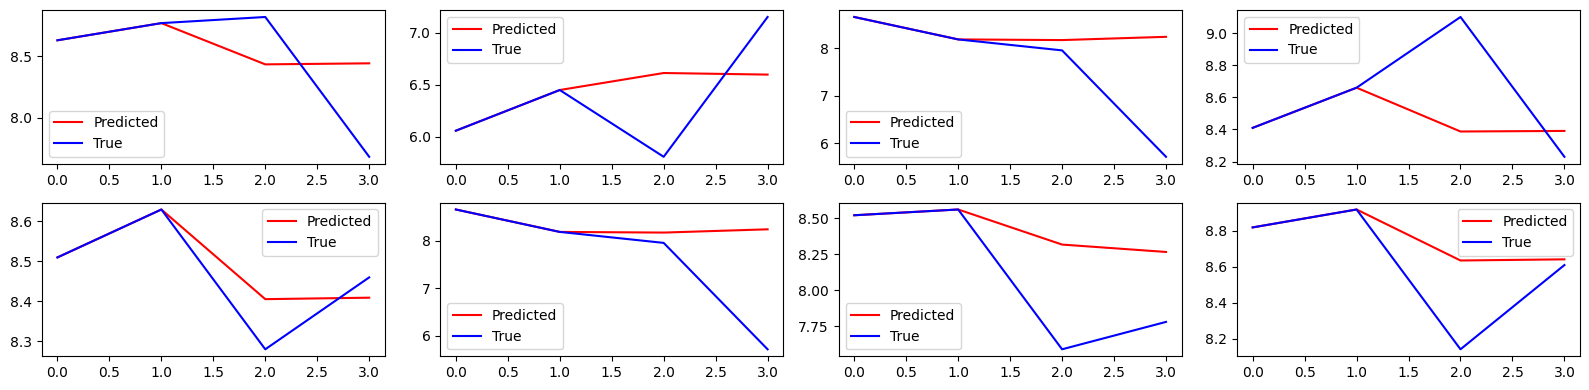

In [ ]:
datapoint_idxs = np.random.randint(0, 100, size=8) # size is not prime

y_prev = X_test[datapoint_idxs, :, 0]*10
y_pred = predictions[datapoint_idxs]*10
y_true = y_test[datapoint_idxs]*10

visualize_result(y_prev=y_prev, y_pred=y_pred, y_true=y_true)